In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
cust_ords_merge = pd.read_pickle(r'C:\Users\matth\OneDrive\Documents\Matthew\Coding Class\Career_Foundry Data Science Course\2. Data Immersion\Lesson 4\Python Folder for Lesson 4\02 Data\Prepared Data\customers_ords_merge.pkl')

In [3]:
path = r'C:\Users\matth\OneDrive\Documents\Matthew\Coding Class\Career_Foundry Data Science Course\2. Data Immersion\Lesson 4\Python Folder for Lesson 4'

In [5]:
cust_ords_merge['max_order'] = cust_ords_merge.groupby(['user_id'])['order_number'].transform(np.max)



In [7]:
cust_ords_merge.loc[cust_ords_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
cust_ords_merge.loc[(cust_ords_merge['max_order'] <= 40) & (cust_ords_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
cust_ords_merge.loc[cust_ords_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'


In [8]:
cust_ords_merge['loyalty_flag'] = cust_ords_merge['loyalty_flag']

In [ ]:
#1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date 
#project data (i.e., the data set with your new customer data from the first part of this task).

#2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, 
#and a line chart, using a sample subset for the line chart.

#See turned in file "4.9 Intro to Data Visualization"

<AxesSubplot:>

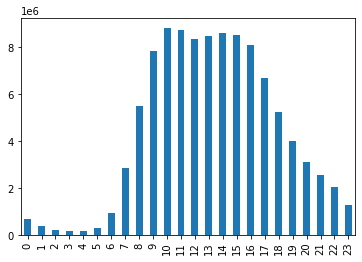

In [9]:
#3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of 
#the “order_hour_of_day” column.

cust_ords_merge['order_hour_of_day'].value_counts().sort_index().plot.bar()


#In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [ ]:
#figure 4.9_1 This histogram depicts the orders by hours of the day when they were ordered

<AxesSubplot:>

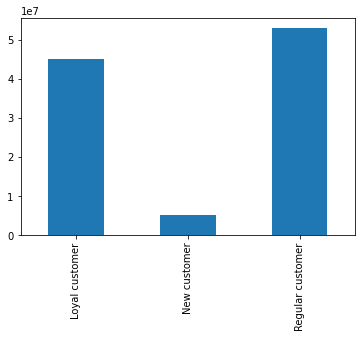

In [10]:
#4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
#Create a bar chart from the “loyalty_flag” column.

cust_ords_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [27]:
#figure 4.9_2

#5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
#(Hint: To check this, you need to use an accurate sample for your line chart!)

sample = cust_ords_merge[:1000000]

In [14]:
cust_ords_merge['prices'].describe()

count    1.033582e+08
mean              NaN
std               NaN
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max               inf
Name: prices, dtype: float64

In [15]:
cust_ords_merge.loc[cust_ords_merge['prices'] >100, 'prices'] = np.nan

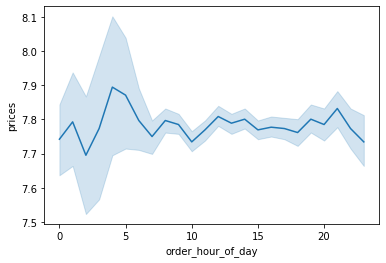

In [16]:
line = sns.lineplot(data = sample, x = 'order_hour_of_day',y = 'prices')

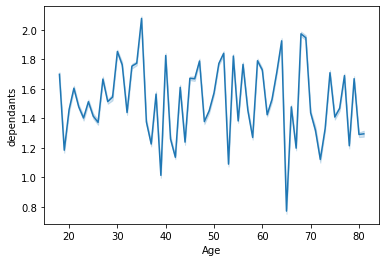

In [20]:
#figure 4.9_3

#6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics 
#to inform the targeted marketing campaigns. 

#First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections
#between age and number of dependents:

#In a markdown cell beneath your line chart, describe what the line chart shows.

line2 = sns.lineplot(data = sample, x = 'Age',y = 'dependants')

In [21]:
#figure 4.9_4 shows the relationship between the average number of dependants by ages grouped by 10. 

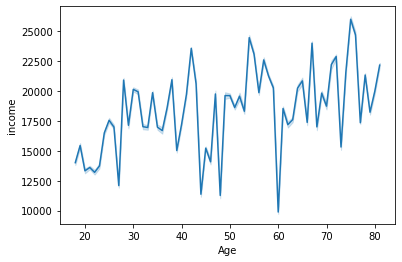

In [28]:
#7 You’ll also need to explore whether there’s a connection between age and spending power. 
#To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

line3 = sns.lineplot(data = sample, x = 'Age',y = 'income')

In [26]:
cust_ords_merge['income'].describe()

count    4.943439e+07
mean     1.770530e+04
std      1.014163e+04
min      0.000000e+00
25%      8.502000e+03
50%      1.817300e+04
75%      2.748300e+04
max      3.276700e+04
Name: income, dtype: float64

In [24]:
cust_ords_merge.loc[cust_ords_merge['income'] <0, 'income'] = np.nan

In [29]:
#8 Export your visualizations as “.png” files in your relevant project folder


line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_price_by_hour_of_day.png'))
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_by_age.png'))
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_age.png'))

In [30]:
cust_ords_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.9_cust_ords_merge.pkl'))